In [1]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
data = pd.read_csv('Desktop/adult.data', sep=',', skipinitialspace = True)
backup_date = data.copy()

About this file

Attributes:

income: >50K, <=50K (TO BE PREDICTED)

age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

fnlwgt: continuous

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

education-num: continuous

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

sex: Female, Male

capital-gain: continuous

capital-loss: continuous

hours-per-week: continuous

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [3]:
data.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#changing column names in our dataframe
cols = ['age', 'work-class', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = cols

In [5]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
work-class        32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#data statistics like mean, median, min value, max, q1, q3
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
numerical_att = data.select_dtypes(include=['int64']) # selecting numerical attributes from our dataframe

numerical_att.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A086320>,
      dtype=object)

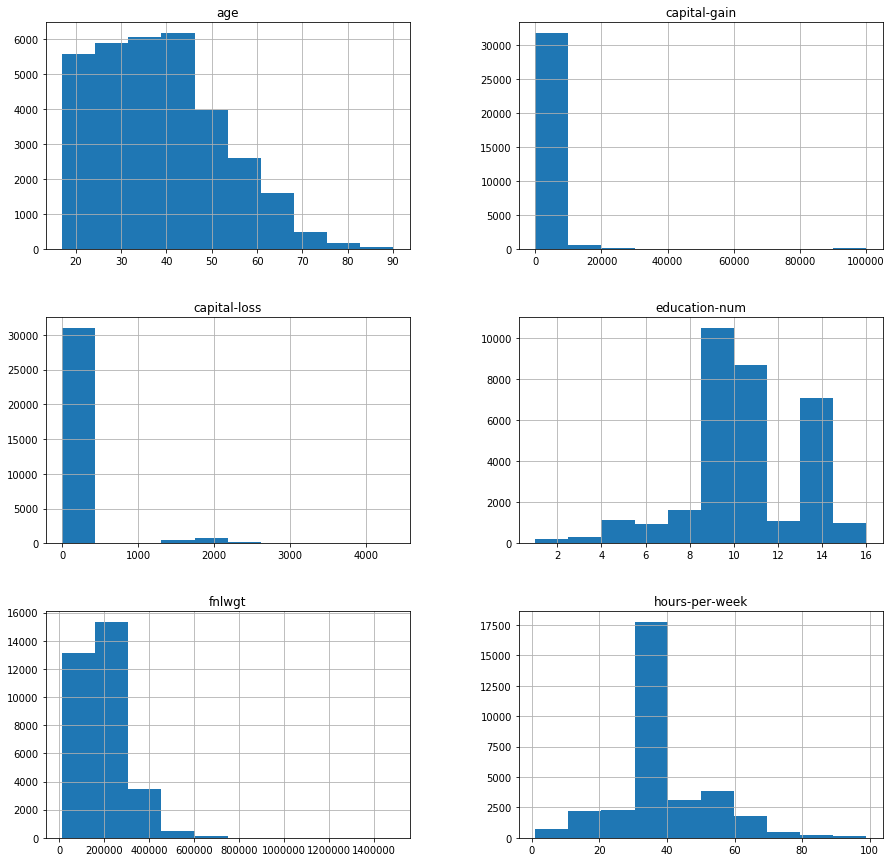

In [9]:
#visualization of data using histograms of numerical attributes
numerical_att.hist(figsize=(15,15))

Inferences: 

1. Age of most individuals is less than 50. Maximum age as seen in plot is 90.
2. Most of the people have capital gain between 0 and 20,000. There are also a small number of outliers who earn upto 100,000 via capital-gains.
3. Overall, maximum number of people have capital loss ranging from 0 to 1000. Of the people who have had a capital loss, the average seems to be around 2000.
4. Maximum number of people have had an education-num of 9 or 10.
5. Most of the people work around 40 hrs per week. However there are a few who don’t work and a few who work for almost 100 hours a week.

In [10]:
data.isnull().sum()

age               0
work-class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

The histograms were used to analyze numerical data

For categorical data we can look at frequency distributions

In [11]:
#selecting categorical variables from our dataset
categorical_att = data.select_dtypes(include=['object'])
categorical_att.head()

,work-class,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Analyzing each column one by one

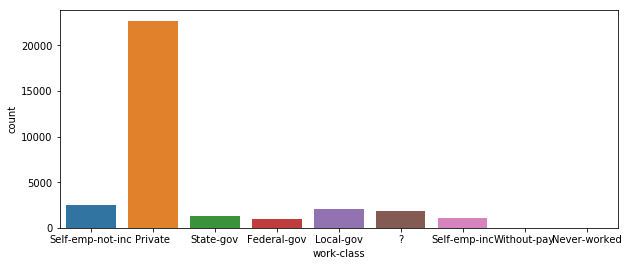

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=categorical_att, x='work-class')

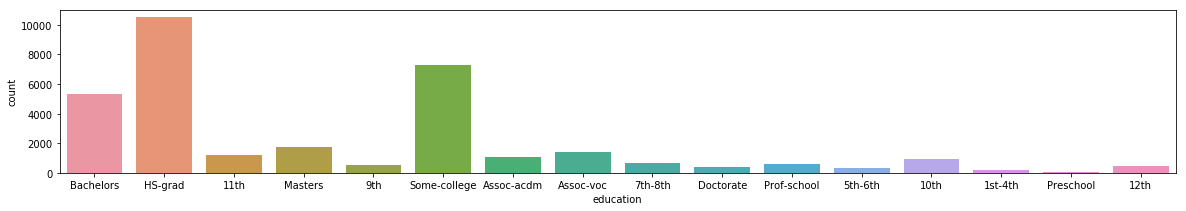

In [13]:
plt.figure(figsize=(20,3))
sns.countplot(data=categorical_att, x='education')

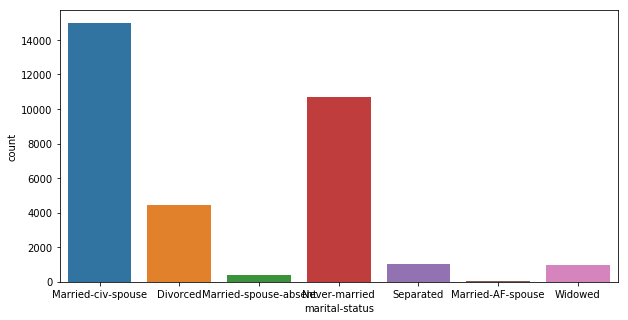

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_att, x='marital-status')

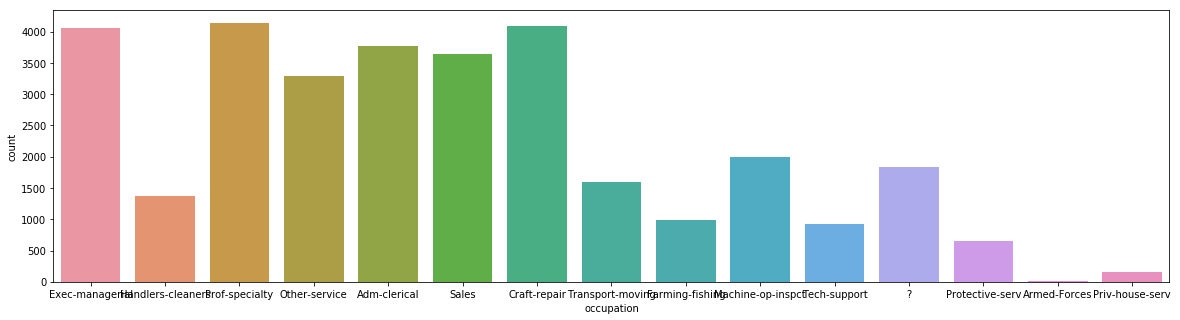

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(data=categorical_att, x='occupation')

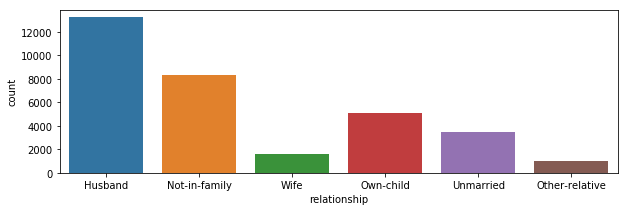

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(data=categorical_att, x='relationship')

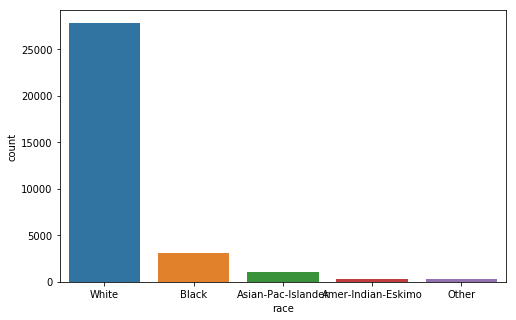

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=categorical_att, x='race')

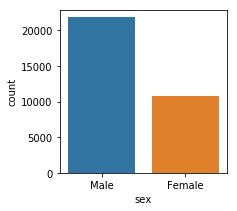

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(data=categorical_att, x='sex')

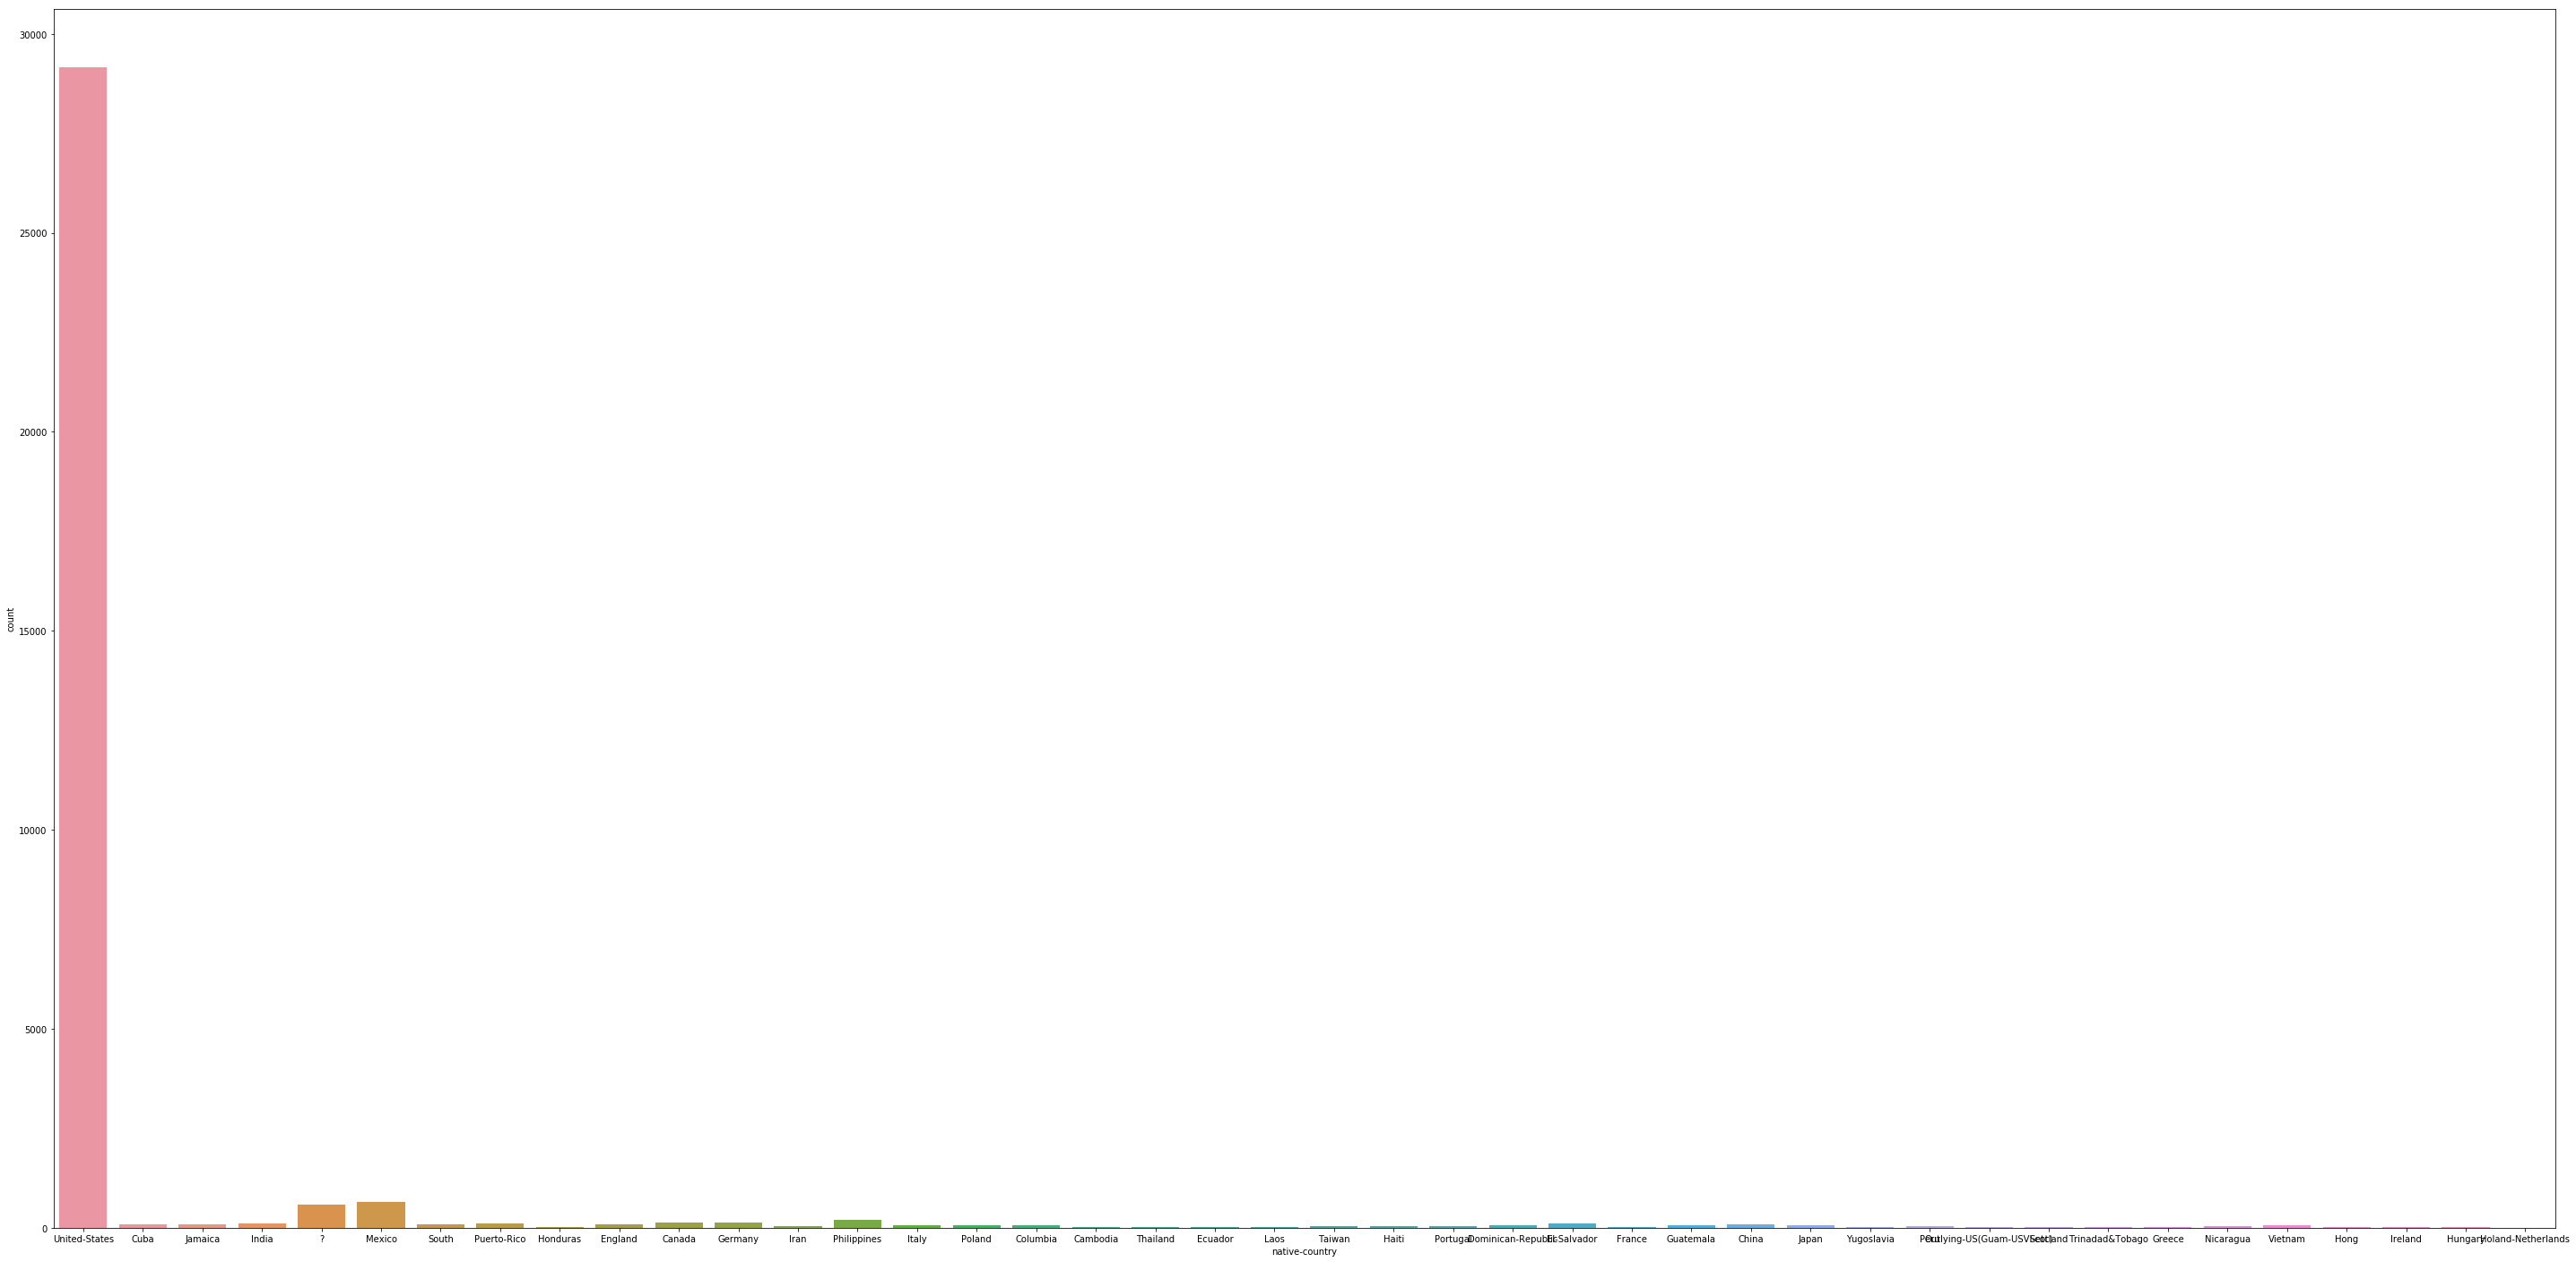

In [19]:
plt.figure(figsize=(50,25))
sns.countplot(data=categorical_att, x='native-country')

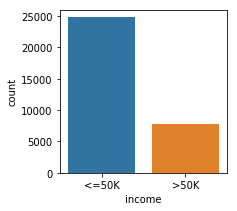

In [20]:
plt.figure(figsize=(3,3))
sns.countplot(data=categorical_att, x='income')

*INFERENCE:*

**1. work-class:**
Maximum number of people belong to private sector and the others are distributes among remaining sectors and From the plot it looks as if there are no people who work without-pay or have never worked. There is also a bar in the graph that says '?' these are missing values.

**2. education:**
Most of the people are high-school grads or have studied in some college, or doing their bachelors. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model.

**3. marital-status:**
Majority of the population are married. The next highest number is the group of people who have never been married.

**4. occupation:**
There are 14 occupations mentioned of which the least number of people are found in armed forces. There is also a bar that says '?', these represent missing values of occupation in our dataset. There is a good distribution of people over the occupations "Exec-managerial", "Prof-specialty", "adm-clerical", "sales", "craft-repair" and "other-services"

**5. relationship:**
Most of the people are husbands.

**6. race:**
Most of the people belong to "White" race

**7. sex:**
Of the total people,majority of the people are males (over 20,000). The number of females are around 10,000.

**8. native country:**
Maximum people belong to the USA.

**9. income:**
Majority of the people earn <=50k, indicating a skewed dataset as there is not equal number of training examples for both the output categories.

In [21]:
count = 0
for i in range(len(categorical_att['native-country'])):
    if(categorical_att['native-country'][i]=='?'):
        count+=1
print("Missing values in native-country:", count)

Missing values in native-country: 583


In [22]:
count = 0
for i in range(len(categorical_att['work-class'])):
    if(categorical_att['work-class'][i]=='?'):
        count+=1
print("Missing values in work-class:", count)

Missing values in work-class: 1836


In [23]:
count = 0
for i in range(len(categorical_att['occupation'])):
    if(categorical_att['occupation'][i]=='?'):
        count+=1
print("Missing values in occupation:", count)

Missing values in occupation: 1843


In [24]:
print("Total records: ", len(data))

Total records:  32560


As we can see, the the missing values (native-country, occupation and work-class) form a small percent of the entire dataset (1.8%, 5.6% and 5.6% respectively)

So we can eliminate the records having missing values

In [147]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#Inferences to be written 

In [25]:
data = data.drop(data[data['occupation']=='?'].index)

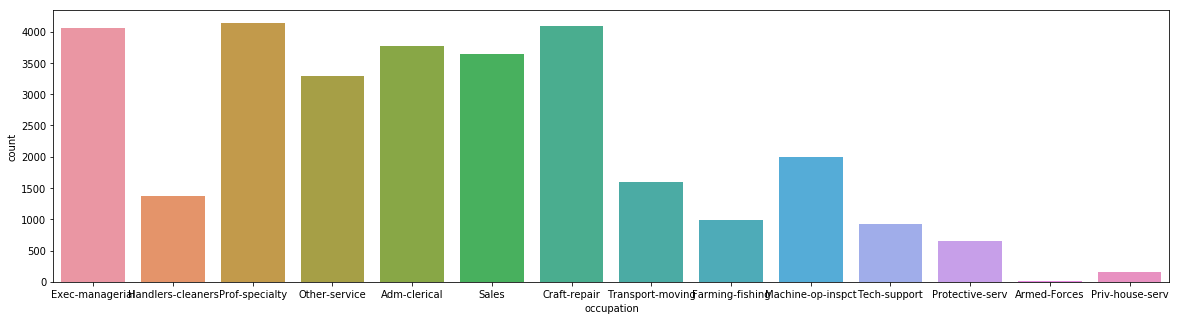

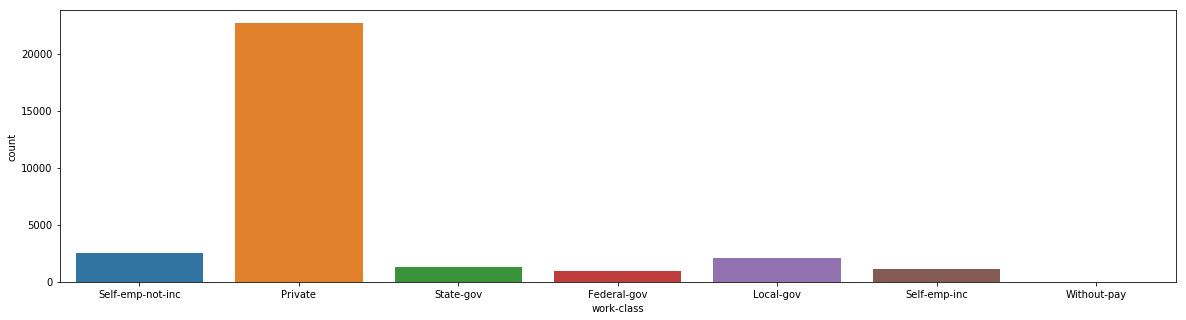

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(data=data, x='occupation')

plt.figure(figsize=(20,5))
sns.countplot(data=data, x='work-class')

The "?" (missing values) have been removed from occupation and workclass

Doing the same for native country

In [38]:
data = data.drop(data[data['native-country']=='?'].index)

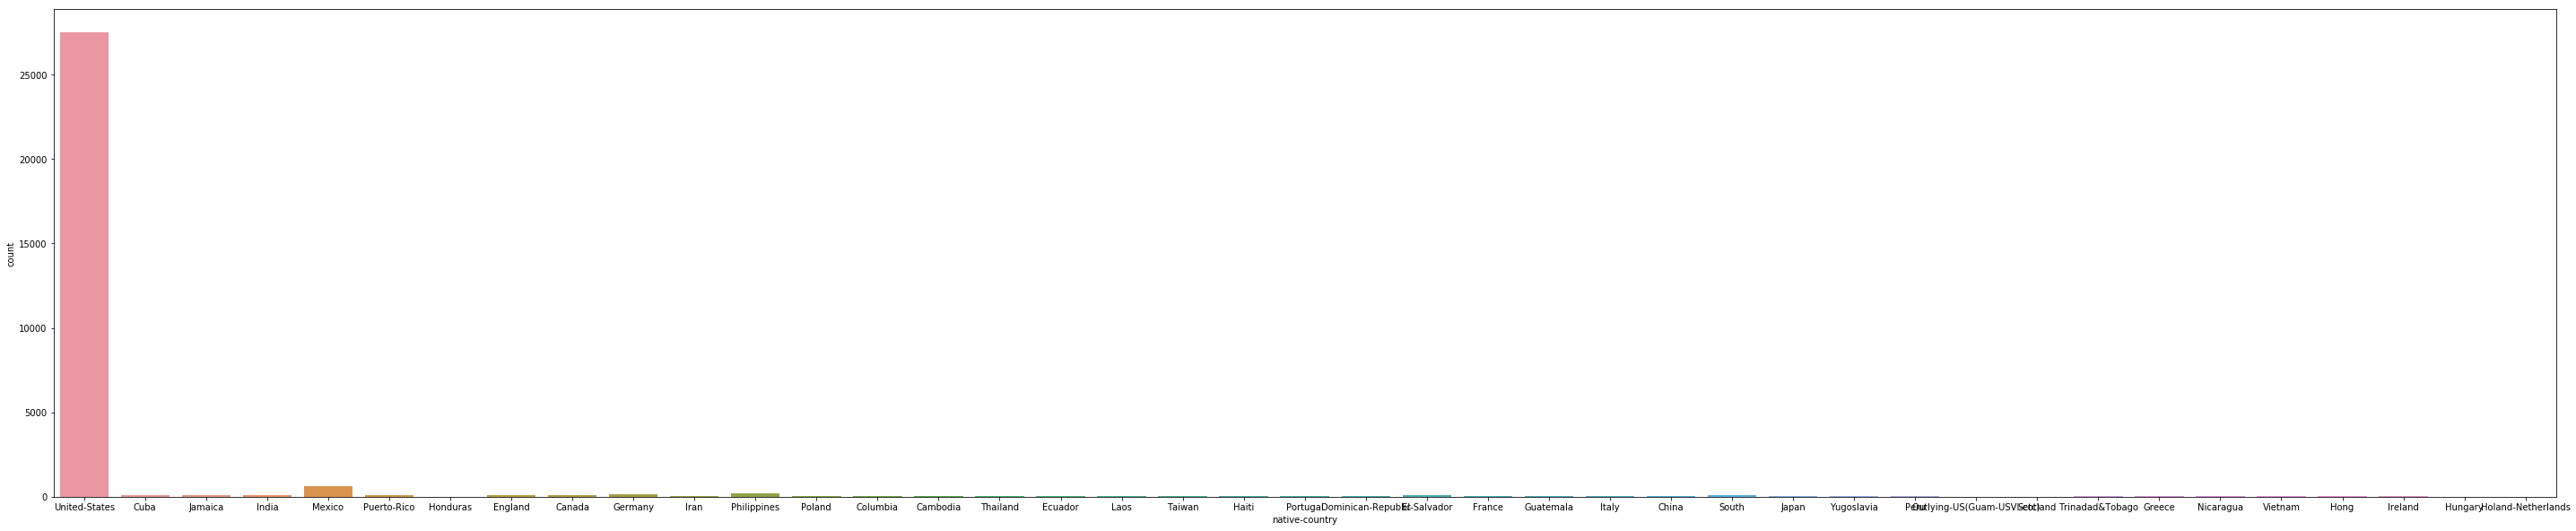

In [40]:
plt.figure(figsize=(50,10))
sns.countplot(data=data, x='native-country')

To reduce number of categories of native-country, lets do grouping.

Since majority of people belong to the USA, we can group all the other countries as one group viz, "Others"

In [41]:
data['native-country'] = data['native-country'].apply(lambda x: "United-States" if x=="United-States" else "Others")

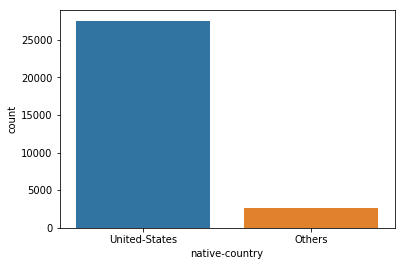

In [42]:
sns.countplot(data=data, x='native-country')

In [75]:
#doing the same for education
data['education'].replace('Preschool', 'Below-HS', inplace=True)
data['education'].replace('10th', 'Below-HS', inplace=True)
data['education'].replace('5th-6th', 'Below-HS', inplace=True)
data['education'].replace('7th-8th', 'Below-HS', inplace=True)
data['education'].replace('5th-6th', 'Below-HS', inplace=True)
data['education'].replace('HS-grad', 'HighSchoolGrad', inplace=True)
data['education'].replace('HS-Grad', 'HighSchoolGrad', inplace=True)
data['education'].replace('11th', 'College', inplace=True)
data['education'].replace('12th', 'College', inplace=True)
data['education'].replace('Some-college', 'College', inplace=True)
data['education'].replace('Assoc-acdm', 'College', inplace=True)
data['education'].replace('Assoc-voc', 'College', inplace=True)
data['education'].replace('Prof-school', 'Masters', inplace=True)

In [77]:
data['education'].replace('9th', 'Below-HS', inplace=True)
data['education'].replace('1st-4th', 'Below-HS', inplace=True)

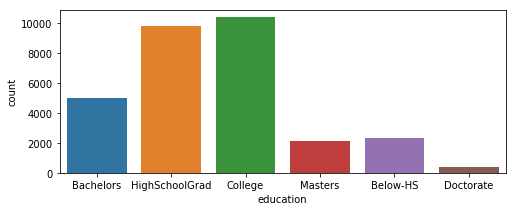

In [81]:
plt.figure(figsize=(8,3))
sns.countplot(data=data, x='education')

Doing the same for work-class

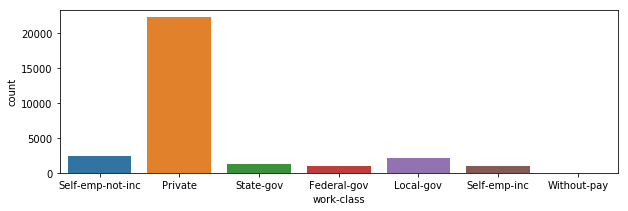

In [84]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, x='work-class')

In [85]:
data['work-class'].replace('Self-emp-not-inc', 'Self-employed', inplace=True)
data['work-class'].replace('Self-emp-inc', 'Self-employed', inplace=True)
data['work-class'].replace('State-gov', 'Government', inplace=True)
data['work-class'].replace('Local-gov', 'Government', inplace=True)
data['work-class'].replace('Federal-gov', 'Government', inplace=True)

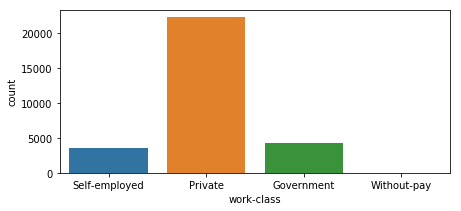

In [87]:
plt.figure(figsize=(7,3))
sns.countplot(data=data, x='work-class')

We can do a similar type of grouping for other categorical attributes as well.

**DATA RELATIONSHIPS/CORRELATIONS**

This can only be checked for numerical feautures

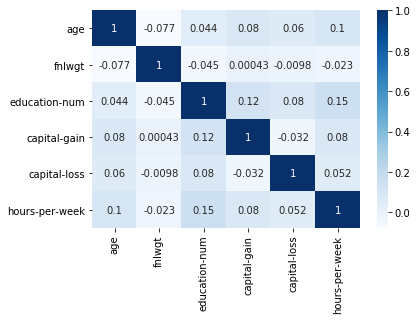

In [44]:
#correlation between all features of the dataset
sns.heatmap(data.corr(), annot=True, cmap='Blues')

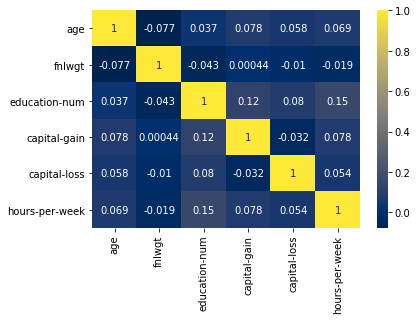

In [45]:
#Correlation between only numerical features
sns.heatmap(numerical_att.corr(), annot=True, cmap='cividis')

*Inference:*

We can see that there is not much correlation among all features.

Checking for duplicate values:

In [46]:
data.duplicated().sum()

23

This is a very small number, these rows can be dropped

In [47]:
data = data.drop_duplicates()
data.duplicated().sum()

0

OUTLIERS 

    Since there are not many people having capital gain above 90,000 we will drop these rows.
    

In [48]:
outliers = data[data['capital-gain']>=90000].index
print(len(outliers))

148


In [50]:
data = data.drop(outliers)

In [52]:
#Checking if it has been dropped
outliers = data[data['capital-gain']>=90000].index
print(len(outliers))

0


**Checking correlation between numerical and categorical data using countplots**

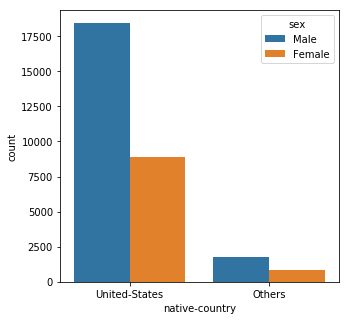

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='native-country', hue='sex')

The ratio of USA and Others looks similar, which is good.

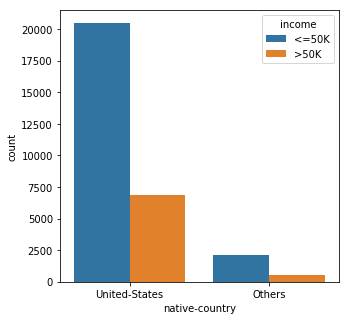

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='native-country', hue='income')

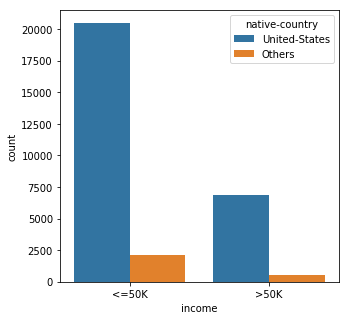

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='income', hue='native-country')

These ratios are similar too.

In [63]:
data.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

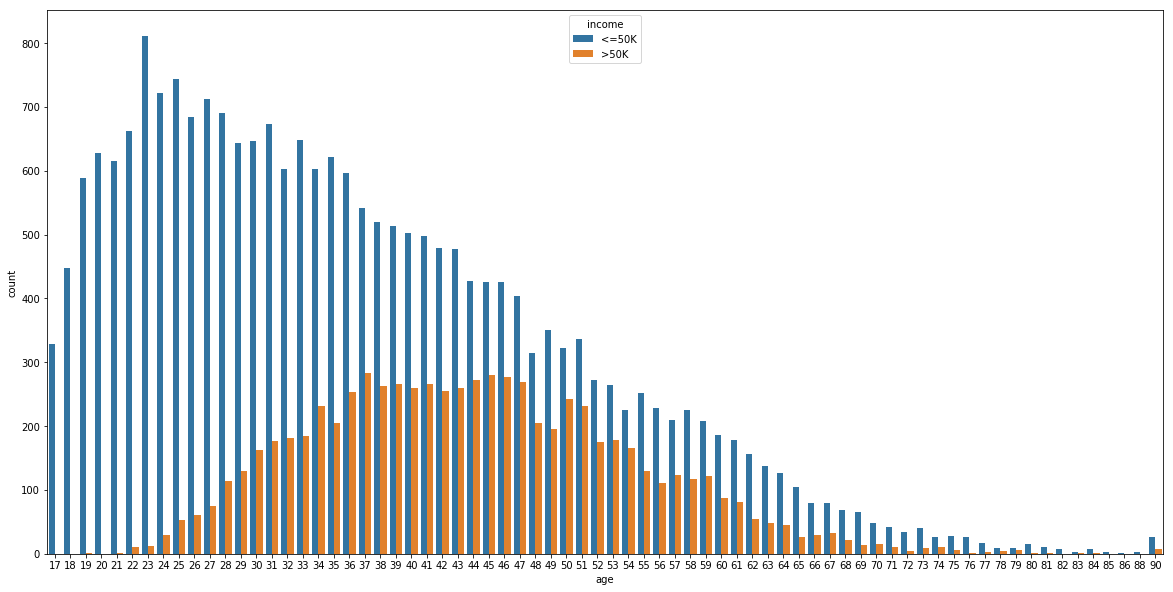

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='age', hue='income')

The number of people earning <=50k is the maximum at age 23

The number of people earning >50k is the macimum at age 37

This shows that experience is important for having more income

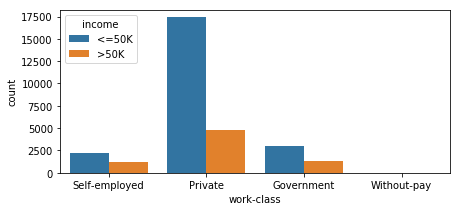

In [89]:
plt.figure(figsize=(7,3))
sns.countplot(data=data, x='work-class', hue='income')

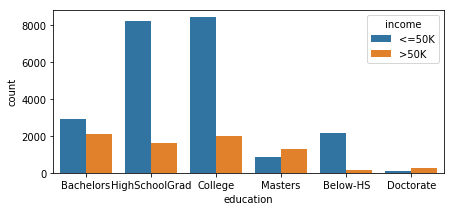

In [90]:
plt.figure(figsize=(7,3))
sns.countplot(data=data, x='education', hue='income')

This shows that the people working in the private sector are the people who earn the most and that people with higher education like bachelors have more income.

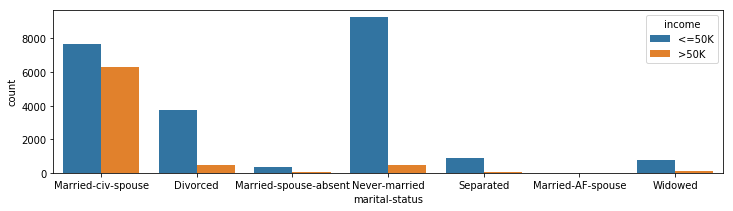

In [99]:
plt.figure(figsize=(12,3))
sns.countplot(data=data, x='marital-status', hue='income')

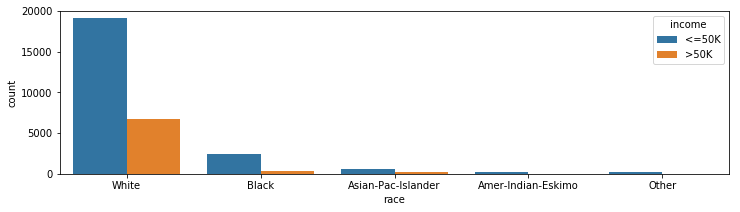

In [100]:
plt.figure(figsize=(12,3))
sns.countplot(data=data, x='race', hue='income')

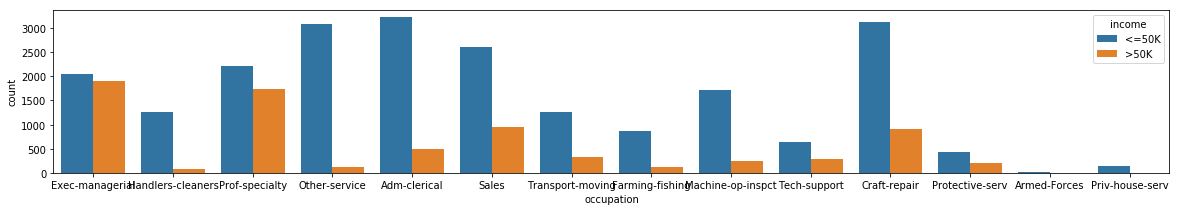

In [103]:
plt.figure(figsize=(20,3))
sns.countplot(data=data, x='occupation', hue='income')

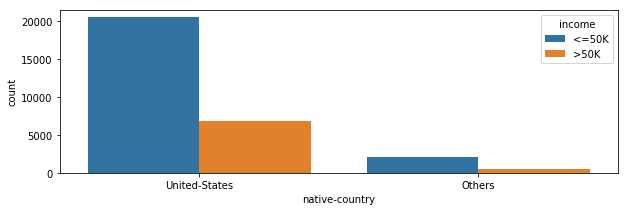

In [107]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, x='native-country', hue='income')

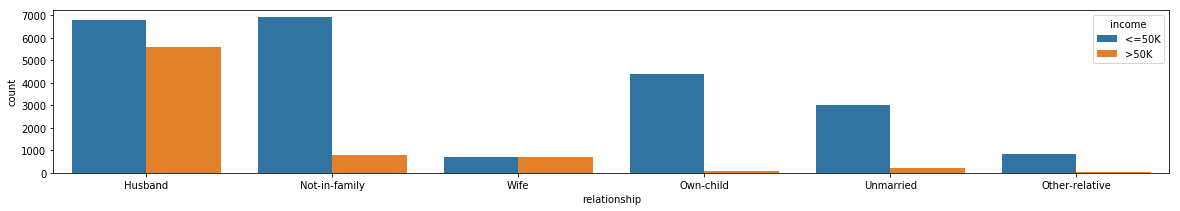

In [104]:
plt.figure(figsize=(20,3))
sns.countplot(data=data, x='relationship', hue='income')

***Inference***

Majority of people earning more than 50k belong to private sector, have done higher education, are males (mostly married), belong to the United States, are majorly White (race).

Some frequency distributions

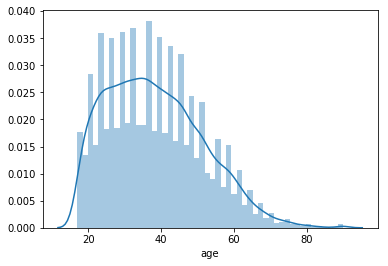

In [108]:
sns.distplot(data['age'])

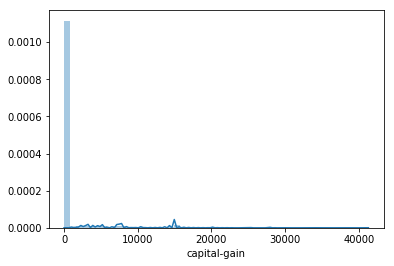

In [111]:
sns.distplot(data['capital-gain'])

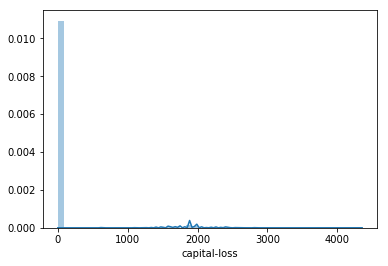

In [112]:
sns.distplot(data['capital-loss'])

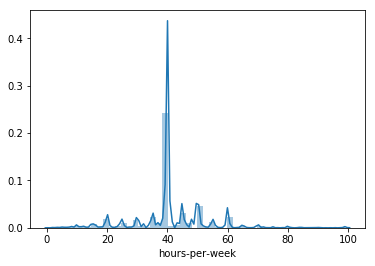

In [113]:
sns.distplot(data['hours-per-week'])